Note that this functionality exists in monodromy, but I could not get the coordinate normalizations to work

```python
monodromy.coordinates.mirror_monodromy_polytope
```


In [ ]:
# !pip uninstall -y matplotlib && pip install matplotlib==3.7.2

In [2]:
from qiskit.circuit.library import SwapGate, CXGate
from qiskit.quantum_info import random_unitary
from qiskit.extensions import UnitaryGate
from monodromy.haar import expected_cost
from qiskit.circuit.library import iSwapGate, XXPlusYYGate, CXGate
import numpy as np
from monodromy.render import gates_to_coverage_plot
from monodromy.haar import expected_cost
from monodromy.coverage import coverage_lookup_cost
import h5py
import json
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter
import scienceplots
import LovelyPlots.utils as lp
from tqdm import tqdm

# %matplotlib widget

In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import CZGate
from qiskit.quantum_info.operators import Operator
from qiskit.circuit import Gate
from monodromy.haar import gates_to_haar
from qiskit.circuit.library import CXGate, iSwapGate
import numpy as np

qc = QuantumCircuit(2)
qc.append(iSwapGate().power(-1), [0, 1])
qc.append(CZGate().power(1 / 6), [0, 1])
syc = Operator(qc)
syc.name = "syc"
syc.params = []

In [4]:
print(gates_to_haar(syc))

3.0001374571237025


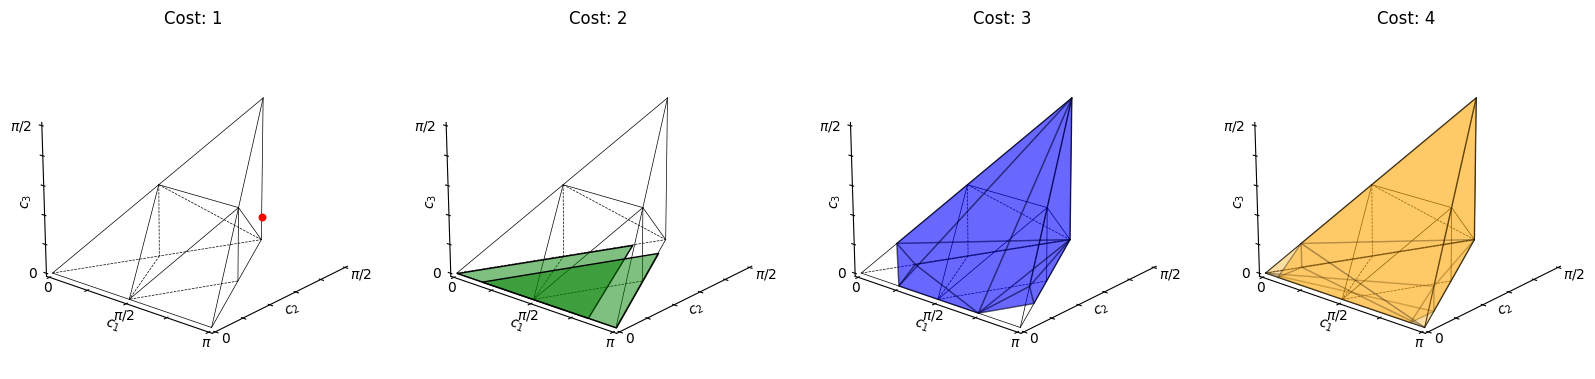

[CircuitPolytope(convex_subpolytopes=[ConvexPolytope(inequalities=[], equalities=[[0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]], name='origin')], cost=0.0, operations=[], instructions=[]),
 CircuitPolytope(convex_subpolytopes=[ConvexPolytope(inequalities=[[1, 0, 0, 0]], equalities=[[-11, 24, 0, 0], [-1, 0, 24, 0], [-1, 0, 0, 24]], name='True ∩ QLR relations ∩ A_SU(4)^monodromy ∩ A_SU(4)^monodromy ∩ A_SU(4)^monodromy ∩ True ∩ QLR relations ∩ A_SU(4)^monodromy ∩ A_SU(4)^monodromy ∩ A_SU(4)^monodromy ∩ origin ∩ anonymous_convex_polytope_11 ∩ True ∩ A_PU(4)^monodromy ∩ A_PU(4)^monodromy ∩ origin')], cost=1, operations=['syc'], instructions=[Operator([[1.00000000e+00+0.j , 0.00000000e+00+0.j , 0.00000000e+00+0.j ,
            0.00000000e+00+0.j ],
           [0.00000000e+00+0.j , 6.12323400e-17+0.j , 0.00000000e+00-1.j ,
            0.00000000e+00+0.j ],
           [0.00000000e+00+0.j , 0.00000000e+00-1.j , 6.12323400e-17+0.j ,
            0.00000000e+00+0.j ],
           [0.00000000e+00+0.j , 

In [5]:
from monodromy.render import gates_to_coverage_plot

gates_to_coverage_plot(syc, overlap=False)

In [6]:
class ErrorModel:
    """Use exponential decay error model.

    Define fidelity model as some function of (time) cost.
    """

    def __init__(self, unit_fidelity=0.99):
        """Unit fidelity is the fidelity of operation with unit cost 1.0

        NOTE: simple convention is that CX, iSWAP have unit cost 1.0, then
        sqrt(CX) and sqrt(iSWAP) have unit cost 0.5, etc.
        """
        assert 0 <= unit_fidelity and unit_fidelity <= 1
        self.unit_fidelity = unit_fidelity
        self.normalized_lifetime = -1.0 / np.log(unit_fidelity)

    def fidelity(self, cost):
        """Convert (time) cost to fidelity"""
        return np.exp(-cost / self.normalized_lifetime)

    def infidelity(self, cost):
        """Convert (time) cost to infidelity"""
        return 1 - self.fidelity(cost)


# ErrorModel(0.99).fidelity(1.5)

In [11]:
U = syc
safe_basis_str = "syc"
basis_str = "syc"
basis_cost = 1.0

unit_fidelity = 0.99
affine_error_model = ErrorModel(unit_fidelity=unit_fidelity)

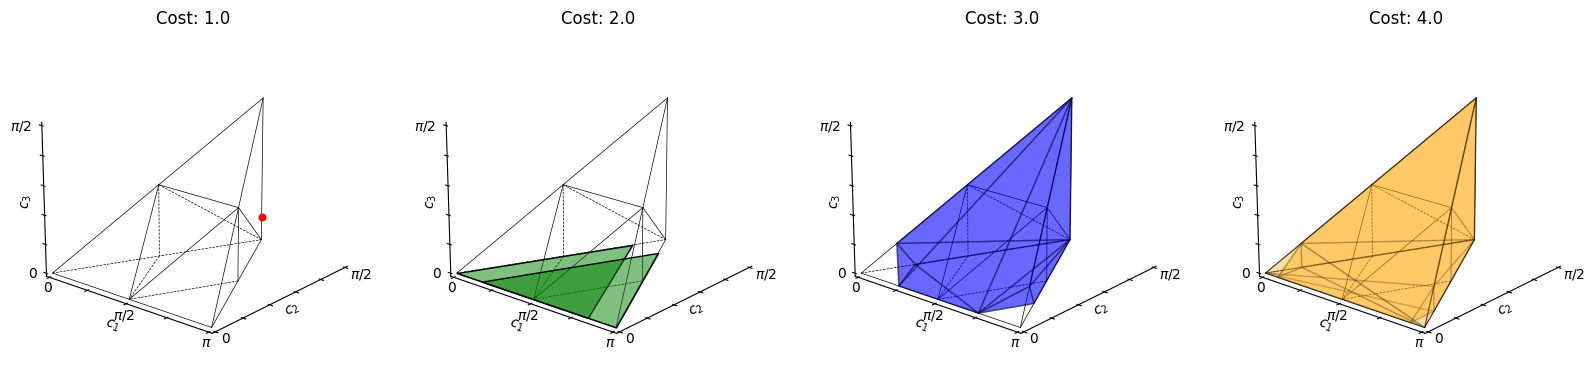

3.0001374571237025
0.9702976595423094


In [12]:
coverage_1 = gates_to_coverage_plot(U, costs=[basis_cost])
no_mirror_haar_exact = expected_cost(coverage_1)
print(no_mirror_haar_exact)
average_fidelity = affine_error_model.fidelity(no_mirror_haar_exact)
print(average_fidelity)

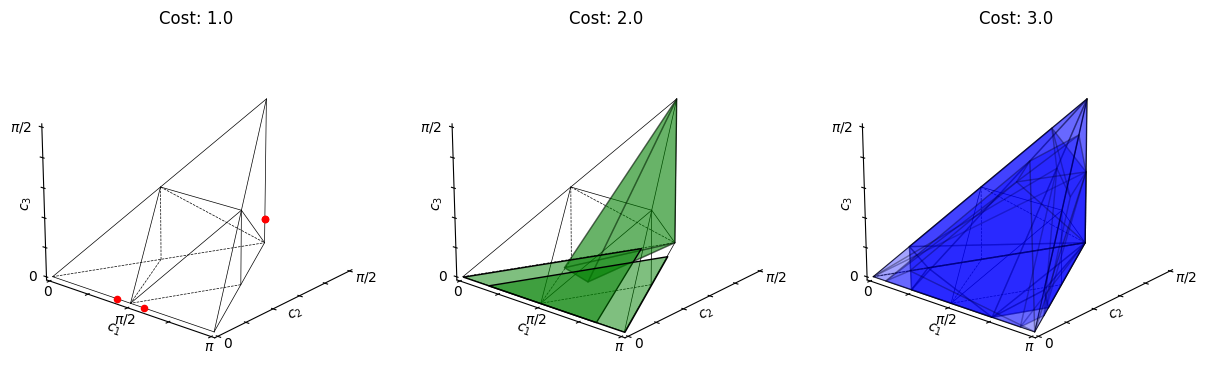

2.999999999999999
0.970299


In [13]:
coverage_2 = gates_to_coverage_plot(U, SwapGate(), costs=[basis_cost, 0])
mirror_haar_exact = expected_cost(coverage_2)
print(mirror_haar_exact)
average_fidelity = affine_error_model.fidelity(mirror_haar_exact)
print(average_fidelity)